In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def pol2cart(rho, theta):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

In [3]:
# def get_distance(x2,y2,x1,y1):
#     return np.sqrt((x2-x1)**2 + (y2-y1)**2)

# def distance_btwn_points(p0,p1):
#     x2 = p1[0]
#     y2 = p1[1]
#     x1 = p0[0]
#     y1 = p0[1]
#     return get_distance(x2,y2,x1,y1)

In [4]:
class Vector:
    def __init__(self, tail_x, tail_y, mag_x, mag_y):
        self.tail_x = tail_x
        self.tail_y = tail_y
        
        self.mag_x = mag_x
        self.mag_y = mag_y
        
        # self.head_x = tail_x + mag_x
        # self.head_y = tail_y + mag_y
        
        # for if need convert vector's magnitude into polar coords
        self.rho = None
        self.theta = None
        
    def polar(self):
        self.rho, self.theta = cart2pol(self.mag_x, self.mag_y)
        
    def cart(self):
        self.mag_x, self.mag_y = pol2cart(self.rho, self.theta)
        # update vector head
        # self.head_x = self.tail_x + self.mag_x
        # self.head_y = self.tail_y + self.mag_y 

In [5]:
vectors = []

vectors.append(Vector(0,0,0,1))

vectors.append(Vector(0,1,0,1))

vectors.append(Vector(1,0,1,0))

vectors.append(Vector(1,1,1,0))

In [6]:
for v in vectors:
    v.polar()

In [7]:
x_tails = []
y_tails = []
x_mags = []
y_mags = []

for v in vectors:
    x_tails.append(v.tail_x)
    y_tails.append(v.tail_y)
    
    x_mags.append(v.mag_x)
    y_mags.append(v.mag_y)

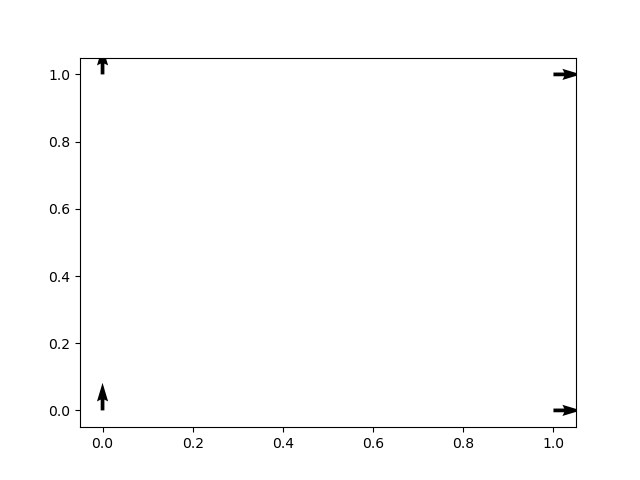

In [8]:
plt.figure()
plt.quiver(x_tails, y_tails, x_mags, y_mags)

In [51]:
new_point = Vector(0.7, 0.7, 0, 0)

In [52]:
# linearly interpolate top two points
# linearly interpoalte bottom two points
# then linearly interpolate with the two new points
top_points = []
bottom_points = []

for v in vectors:
    if v.tail_y == int(new_point.tail_y):
        bottom_points.append(v)
    else:
        top_points.append(v)

In [53]:
# for first two linearly interps
weight_1 = new_point.tail_x - top_points[0].tail_x
# print(f'weights: {(weight_1, weight_2)}')

# horizontal top
rho_1 = (weight_1 * top_points[1].rho) + ((1.0 - weight_1) * top_points[0].rho)
theta_1 = (weight_1 * top_points[1].theta) + ((1.0 - weight_1) * top_points[0].theta)

# horizontal bottom
rho_2 = (weight_1 * bottom_points[1].rho) + ((1.0 - weight_1) * bottom_points[0].rho)
theta_2 = (weight_1 * bottom_points[1].theta) + ((1.0 - weight_1) * bottom_points[0].theta)

# final interp
weight_2 = new_point.tail_y - bottom_points[0].tail_y
# vertial
rho_3 = (weight_2 * rho_1) + ((1.0 - weight_2) * rho_2)
theta_3 = (weight_2 * theta_1) + ((1.0 - weight_2) * theta_2)

In [54]:
new_point.rho = rho_3
new_point.theta = theta_3

new_point.cart()

In [55]:
new_point.mag_x, new_point.mag_y

(0.8910065241883679, 0.4539904997395468)

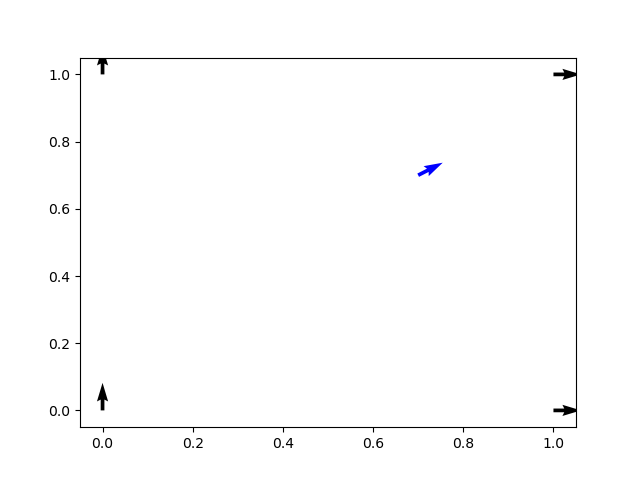

In [56]:
plt.figure()
plt.quiver(x_tails, y_tails, x_mags, y_mags, color='k', linewidth=0.7)
plt.quiver(new_point.tail_x, new_point.tail_y, new_point.mag_x, new_point.mag_y, color='b', linewidth=0.7)